<a href="https://colab.research.google.com/github/arjunchint/mistral_hackathon/blob/main/Mistral_AI_Hackathon_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mistralai

In [ ]:
import os
import requests
from google.colab import userdata

# Get your Mistral API Key from environment variables
#MISTRAL_API_KEY = os.environ.get("MISTRAL_API_TOKEN")
MISTRAL_API_KEY=userdata.get('MISTRAL_API_TOKEN')

API_ENDPOINT = "https://api.mistral.ai/v1"
# Replace with the specific Mistral model you want to use
model_id = "mistral-large-latest"

def generate_text(prompt):
    headers = {"Authorization": f"Bearer {MISTRAL_API_KEY}", "Content-Type": "application/json", "Accept": "application/json"}
    payload = {"model": model_id, "messages": [{"role": "user", "content":prompt}]}

    response = requests.post(f"{API_ENDPOINT}/chat/completions", headers=headers, json=payload)

    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        print(f"Error: {response.status_code}")
        return None

# Sample usage
prompt = "Write a haiku about a cat."
generated_text = generate_text(prompt)
print(generated_text)

Soft purrs fill the night,
In moonlight, shadows cast wide,
Cat's green eyes shining bright.


In [ ]:
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from google.colab import userdata

# Get your Mistral API Key from environment variables
api_key=userdata.get('MISTRAL_API_TOKEN')
model = "mistral-large-latest"

client = MistralClient(api_key=api_key)

messages = [
    ChatMessage(role="user", content="What is the best French cheese?")
]

# No streaming
chat_response = client.chat(
    model=model,
    messages=messages,
)

print(chat_response)#.choices[0].message.content)

id='e89b22146c184e7a80125b7b492e7af9' object='chat.completion' created=1711229529 model='mistral-large-latest' choices=[ChatCompletionResponseChoice(index=0, message=ChatMessage(role='assistant', content='France is renowned for its cheese, and there are hundreds of varieties to choose from, each with its own unique taste, texture, and aroma. The "best" French cheese can depend on personal preference, but here are a few popular ones:\n\n1. Brie de Meaux: Often simply called Brie, this is a soft cheese with a white rind. It\'s creamy and has a mild, slightly sweet flavor.\n\n2. Camembert: Similar to Brie, Camembert is also a soft cheese with a white rind. However, it has a stronger, earthier flavor.\n\n3. Roquefort: This is a blue cheese made from sheep\'s milk. It\'s tangy, salty, and has a distinctive strong flavor.\n\n4. Comté: A hard cheese made from unpasteurized cow\'s milk, Comté has a nutty, slightly sweet flavor.\n\n5. Reblochon: This is a soft, rind-washed cheese with a nutty, 

In [ ]:
#### Streaming o/p ####

from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from google.colab import userdata

# Get your Mistral API Key from environment variables
api_key=userdata.get('MISTRAL_API_TOKEN')
model = "mistral-large-latest"

client = MistralClient(api_key=api_key)

messages = [
    ChatMessage(role="user", content="What is the best French cheese?")
]

# With streaming
stream_response = client.chat_stream(model=model, messages=messages)

for chunk in stream_response:
    print(chunk.choices[0].delta.content)

Querying Tasks for teaching use case

In [ ]:
### Simple query for countries, capitals ###

from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from google.colab import userdata
import textwrap

# Get your Mistral API Key from environment variables
api_key=userdata.get('MISTRAL_API_TOKEN')
model = "mistral-large-latest"

client = MistralClient(api_key=api_key)

### Example structured input - To be received from Luis' Data Ingestion ####
country_data=[{"country":"India", "gdp": "1000000"}, {"country":"China"}, { "country":"Japan"}]


messages = [
    ChatMessage(role="user", content=textwrap.dedent("""\
    Respond with a JSON formatted list of countries, their capital cities, and a 2 line summary of the country from the dataset provided below.  Here's the structure:
[
  { "country": "France", "capital": "Paris", summary: "abc" },
  { "country": "Germany", "capital": "Berlin", summary: "abc" },
  { "country": "Spain", "capital": "Madrid", summary: "abc" }
]
    Here is the dataset:

    """) + str(country_data))
]

# No streaming
chat_response = client.chat(
    model=model,
    messages=messages,
)

print(chat_response.choices[0].message.content)

In [ ]:
### Quiz generation periodic table ###

from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from google.colab import userdata
import textwrap

# Get your Mistral API Key from environment variables
api_key=userdata.get('MISTRAL_API_TOKEN')
model = "mistral-large-latest"

client = MistralClient(api_key=api_key)

### Example structured input - To be received from Luis' Data Ingestion ####
country_data=[{"element":"Carbon", "atomic_weight": "12.011 u"}, {"element":"Iron", "atomic_weight": "55.845 u"}, {"element":"Gold", "atomic_weight": "196.967 u"}]


messages = [
    ChatMessage(role="user", content=textwrap.dedent("""\
    Generate a quiz based on the elements highlighted in the dataset. Here's the structure:
    [{Question: abc, A: 1, B: 2, C: 3},{Question: abdef, A: gg, B: ss, C: dd}]
    Here is the dataset:

    """) + str(country_data))
]

# No streaming
chat_response = client.chat(
    model=model,
    messages=messages,
)

print(chat_response.choices[0].message.content)

Sure, here's a quiz based on the dataset:

1. Question: What is the atomic weight of Carbon?
   A. 55.845 u
   B. 196.967 u
   C. 12.011 u

2. Question: Which element has an atomic weight of approximately 55.845 u?
   A. Carbon
   B. Gold
   C. Iron

3. Question: The atomic weight of Gold is around?
   A. 12.011 u
   B. 55.845 u
   C. 196.967 u


Financial Data Analysis uses

####### Report #######
Based on the provided dataset, here's a report on Artesia municipality's performance for the fiscal year 2022:

1. **Financial Overview**: The Net Position of Artesia municipality in 2022 was $37,746,548, which is an increase of $6,158,549 from the previous year. The total revenues generated were $20,494,101, while the total expenditures were $14,118,827. This indicates a positive financial performance as revenues exceed expenditures.

2. **Fund Balance**: The Unassigned Fund Balance was $4,963,307. This balance represents the portion of the entity's net position that is available for spending at the discretion of the governing body.

3. **Capital Assets and Liabilities**: The municipality's Capital Assets were valued at $28,113,887, while the Long-Term Liabilities were $9,064,322. The Total Debt Outstanding was also $9,064,322, indicating that the municipality's long-term liabilities are entirely composed of debt.

4. **Revenue Capacity**: The primary sources of

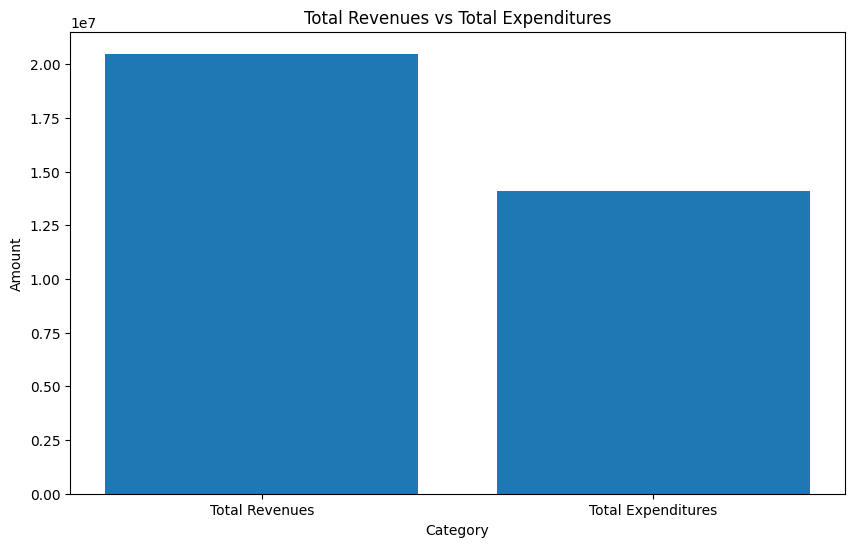

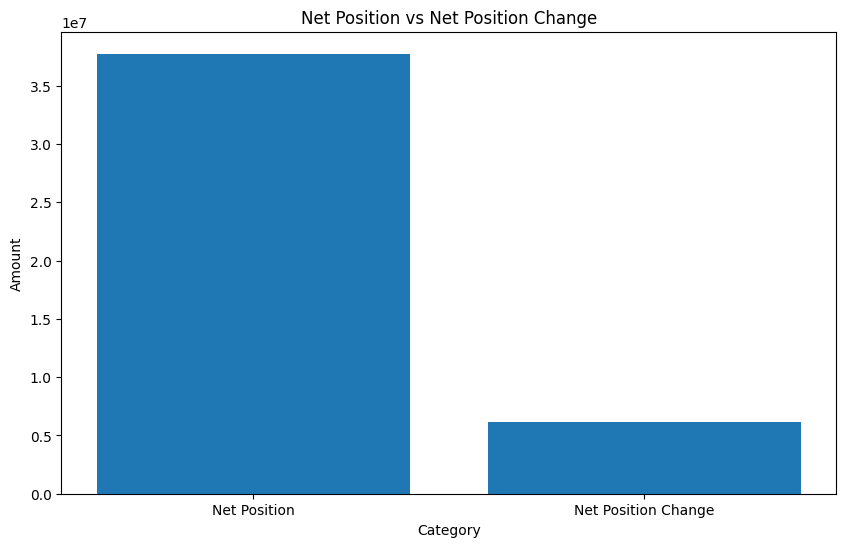

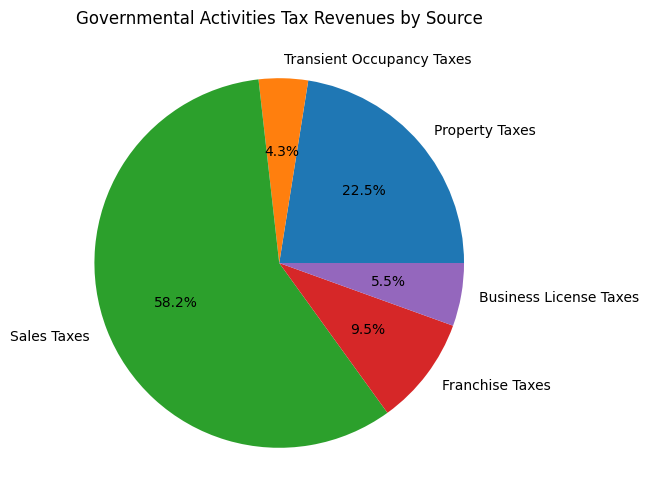

In [ ]:
### Quiz generation periodic table ###

from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from google.colab import userdata
import textwrap
import re
import ast

# Get your Mistral API Key from environment variables
api_key=userdata.get('MISTRAL_API_TOKEN')
model = "mistral-large-latest"

client = MistralClient(api_key=api_key)

def extract_python_code(input_string):
  """Extracts Python code blocks within `python and ` markers.

  Args:
      input_string: The input string potentially containing code blocks.

  Returns:
      A list of extracted Python code blocks.
  """

  pattern = r"`python(.*?)`"  # Regex pattern for code blocks
  matches = re.findall(pattern, input_string, flags=re.DOTALL)
  executable_code = str(matches).strip()[1:-1]  # Remove extra '[' and ']'

  # Use ast.literal_eval for safe conversion
  executable_code = ast.literal_eval(executable_code)

  return executable_code


### Example structured input - To be received from Luis' Data Ingestion ####
alphabet_earnings=[
  {
    "Year": "2023",
    "Revenue": 307394,
    "Cost of Revenue": 133332,
    "Net Income": 73795,
    "Diluted EPS": 5.80
  },
  {
    "Year": "2022",
    "Revenue": 282836,
    "Cost of Revenue": 126203,
    "Net Income": 59972,
    "Diluted EPS": 4.56
  },
  {
    "Year": "2021",
    "Revenue": 257637,
    "Cost of Revenue": 110939,
    "Net Income": 76033,
    "Diluted EPS": 4.561
  }
]

artesia_municipality_audit =[
  {
    "Fiscal Year": 2022,
    "Net Position": 37746548,
    "Net Position Change": 6158549,
    "Total Revenues": 20494101,
    "Total Expenditures": 14118827,
    "Unassigned Fund Balance": 4963307,
    "Capital Assets": 28113887,
    "Long Term Liabilities": 9064322,
    "Total Debt Outstanding": 9064322,
    "Revenue Capacity": {
      "Governmental Activities Tax Revenues by Source": {
        "Property Taxes": 2146321,
        "Transient Occupancy Taxes": 410567,
        "Sales Taxes": 5551693,
        "Franchise Taxes": 909908,
        "Business License Taxes": 525901
      },
      "Assessed Value of Taxable Property": 96,
      "Assessed Value of Taxable Property by Use": {
        "Residential": 60,
        "Commercial": 30,
        "Industrial": 6
      },
      "Direct and Overlapping Property Tax Rates": 1.05,
      "Principal Property Taxpayers": [
        "John Doe",
        "Jane Smith"
      ]
    },
    "Debt Capacity": {
      "Ratios of Outstanding Debt by Type": {
        "General Obligation Debt": 0.6,
        "Revenue Debt": 0.4
      },
      "Ratios of General Bonded Debt Outstanding": 0.7,
      "Direct and Overlapping Bonded Debt": 1.2,
      "Legal Debt Margin": 0.3
    }
  }
]

messages = [
    ChatMessage(role="user", content=textwrap.dedent("""\
    Give me a report on Artesia municipality's performance based on the data highlighted in the dataset.
    Here is the dataset:

    """) + str(artesia_municipality_audit))
]


# No streaming
summary = client.chat(
    model=model,
    messages=messages,
)

print("####### Report #######")
print(summary.choices[0].message.content)


### Code for matlibplot ###

messages = [
    ChatMessage(role="user", content=textwrap.dedent("""\
    Give me Python code to plot graphs for Artesia municipality's performance based on the dataset.
    Here is the dataset:

    """) + str(artesia_municipality_audit))
]

# No streaming
chat_response = client.chat(
    model=model,
    messages=messages,
)

response = chat_response.choices[0].message.content
print("\n ####### Graphs #######")
exec(extract_python_code(response))
#print(extract_python_code(response))
#exec(extract_python_code(response))
